In [3]:
# Install yfinance
!pip install yfinance

# Import and fetch Tesla stock data
import yfinance as yf

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
# Install required libraries
!pip install requests beautifulsoup4 lxml

# Import necessary libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup


# URL for Tesla revenue data
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data_tesla = requests.get(url_tesla, headers={"User-Agent": "Mozilla/5.0"}).text
soup_tesla = BeautifulSoup(html_data_tesla, "html.parser")

# Extract Tesla revenue data
tables_tesla = soup_tesla.find_all("table", {"class": "historical_data_table table"})
df_tesla = None
for table in tables_tesla:
    if "Tesla Quarterly Revenue" in table.text:
        df_tesla = pd.read_html(str(table))[0]
        break

# Clean the Tesla revenue data
df_tesla.columns = ["Date", "Revenue"]
df_tesla = df_tesla[df_tesla["Revenue"] != ""]
df_tesla["Revenue"] = df_tesla["Revenue"].str.replace("$", "").str.replace(",", "")
df_tesla["Revenue"] = pd.to_numeric(df_tesla["Revenue"])
df_tesla["Date"] = pd.to_datetime(df_tesla["Date"])
df_tesla.head()

/tmp/ipykernel_925/1728723474.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_tesla = pd.read_html(str(table))[0]


,Date,Revenue
0,2024-12-31,25707.0
1,2024-09-30,25182.0
2,2024-06-30,25500.0
3,2024-03-31,21301.0
4,2023-12-31,25167.0


In [5]:
# Install yfinance and matplotlib
!pip install yfinance matplotlib

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
# URL for GameStop revenue data
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data_gme = requests.get(url_gme, headers={"User-Agent": "Mozilla/5.0"}).text
soup_gme = BeautifulSoup(html_data_gme, "html.parser")

# Extract GameStop revenue data
tables_gme = soup_gme.find_all("table", {"class": "historical_data_table table"})
df_gme = None
for table in tables_gme:
    if "GameStop Quarterly Revenue" in table.text:
        df_gme = pd.read_html(str(table))[0]
        break

# Clean the GameStop revenue data
df_gme.columns = ["Date", "Revenue"]
df_gme = df_gme[df_gme["Revenue"] != ""]
df_gme["Revenue"] = df_gme["Revenue"].str.replace("$", "").str.replace(",", "")
df_gme["Revenue"] = pd.to_numeric(df_gme["Revenue"])
df_gme["Date"] = pd.to_datetime(df_gme["Date"])
df_gme.head()

/tmp/ipykernel_925/3339004794.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_gme = pd.read_html(str(table))[0]


,Date,Revenue
0,2025-01-31,1283
1,2024-10-31,860
2,2024-07-31,798
3,2024-04-30,882
4,2024-01-31,1794


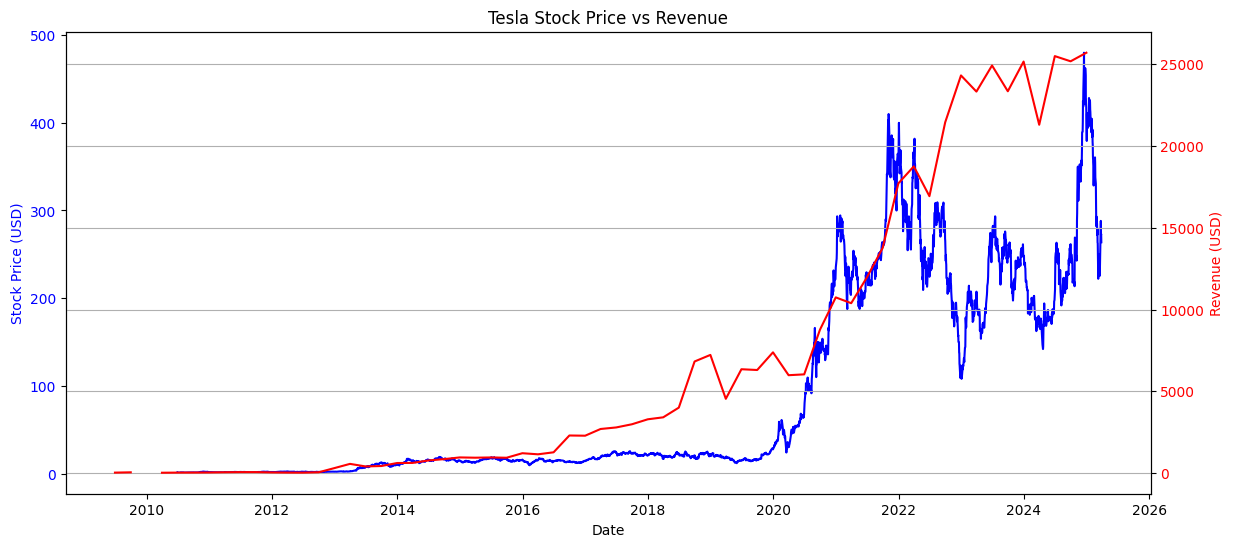

In [7]:
# Plot Tesla stock vs revenue
fig, ax1 = plt.subplots(figsize=(14, 6))

# Stock price plot
ax1.plot(tesla_data["Date"], tesla_data["Close"], color="blue", label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Revenue plot
ax2 = ax1.twinx()
ax2.plot(df_tesla["Date"], df_tesla["Revenue"], color="red", label="Revenue")
ax2.set_ylabel("Revenue (USD)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Tesla Stock Price vs Revenue")
plt.grid(True)
plt.show()

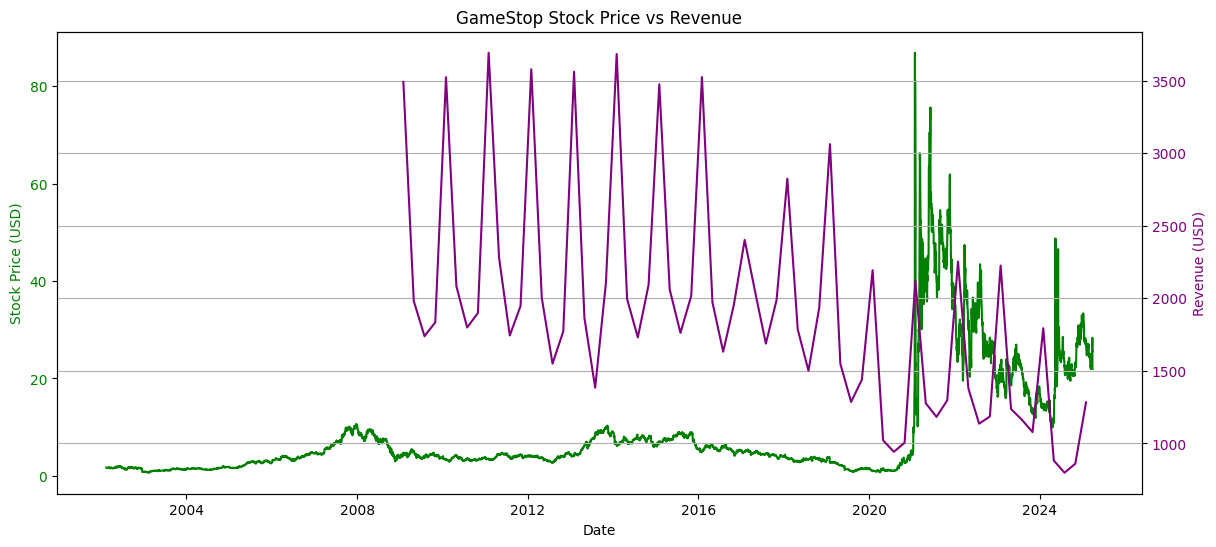

In [8]:
# Plot GameStop stock vs revenue
fig, ax1 = plt.subplots(figsize=(14, 6))

# Stock price plot
ax1.plot(gme_data["Date"], gme_data["Close"], color="green", label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Revenue plot
ax2 = ax1.twinx()
ax2.plot(df_gme["Date"], df_gme["Revenue"], color="purple", label="Revenue")
ax2.set_ylabel("Revenue (USD)", color="purple")
ax2.tick_params(axis="y", labelcolor="purple")

plt.title("GameStop Stock Price vs Revenue")
plt.grid(True)
plt.show()

In [9]:
# Assignment Completed by [Your Name]